In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../Data/spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df['spam'] = df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.Message, df.spam, test_size=0.2)

In [6]:
vec = CountVectorizer()
X_train_count = vec.fit_transform(X_train.values)

In [7]:
model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB()

In [9]:
y_pred = model.predict(vec.transform(X_test.values))

In [11]:
accuracy_score(y_test, y_pred)

0.9865470852017937

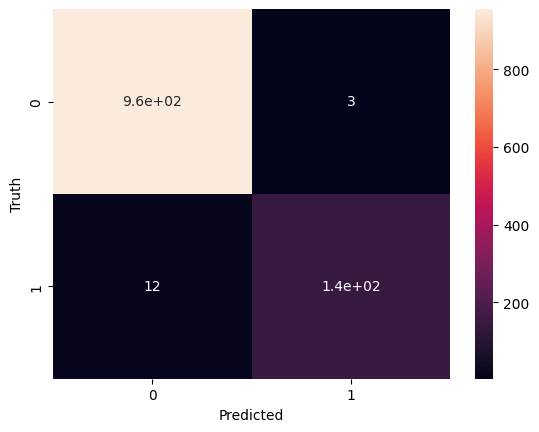

In [13]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

Using Pipeline method

In [14]:
from sklearn.pipeline import Pipeline

In [15]:
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [16]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [17]:
y_pred = clf.predict(X_test)

In [18]:
accuracy_score(y_test,y_pred)

0.9865470852017937

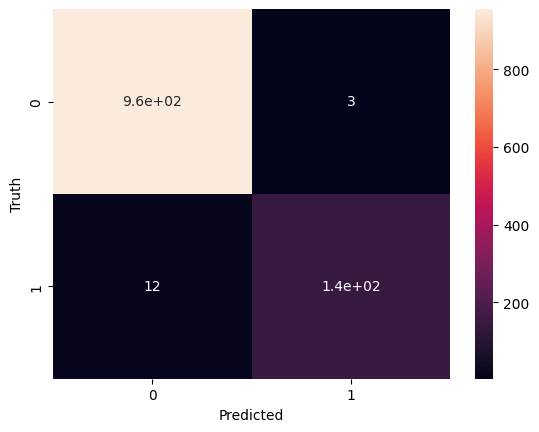

In [19]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()